In [15]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

## Import Data

In [16]:
#set column names
cols = ['name','landmass','zone', 'area', 'population', 'language','religion','bars','stripes','colours',
'red','green','blue','gold','white','black','orange','mainhue','circles',
'crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate','text','topleft','botright']

#import data
df= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data", names = cols)

In [17]:
#set variable names to use as predictors
var = [ 'red', 'green', 'blue','gold', 'white', 'black', 'orange', 'mainhue','bars','stripes', 'circles','crosses', 'saltires','quarters','sunstars','triangle','animate']

In [18]:
#inspect data
df.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


## Transform Data

In [19]:
#get the number of flags by landmass
df_landmass = df["landmass"].value_counts()
df_landmass

4    52
5    39
3    35
1    31
6    20
2    17
Name: landmass, dtype: int64

In [20]:
#df of only europe and oceania (landmass 3,6)
df_36 = df[df["landmass"].isin([3, 6])]
df_36

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
10,Australia,6,2,7690,15,1,1,0,0,3,...,1,1,6,0,0,0,0,0,white,blue
11,Austria,3,1,84,8,4,0,0,3,2,...,0,0,0,0,0,0,0,0,red,red
16,Belgium,3,1,31,10,6,0,3,0,3,...,0,0,0,0,0,0,0,0,black,red
26,Bulgaria,3,1,111,9,5,6,0,3,5,...,0,0,1,0,0,1,1,0,white,red
41,Cook-Islands,6,3,0,0,1,1,0,0,4,...,1,1,15,0,0,0,0,0,white,blue
44,Cyprus,3,1,9,1,6,1,0,0,3,...,0,0,0,0,0,1,1,0,white,white
45,Czechoslovakia,3,1,128,15,5,6,0,0,3,...,0,0,0,0,1,0,0,0,white,red


## Explore Differences Between Landmasses

In [27]:
#find avg values for each variable on each continent
df_meanvar = df_36.groupby(["landmass"])[var].mean()
df_meanvar

,red,green,blue,gold,white,black,orange,bars,stripes,circles,crosses,saltires,quarters,sunstars,triangle,animate
landmass,,,,,,,,,,,,,,,,
3,0.828571,0.2,0.514286,0.428571,0.771429,0.171429,0.057143,0.628571,1.285714,0.028571,0.285714,0.028571,0.028571,0.142857,0.028571,0.114286
6,0.800000,0.2,0.800000,0.600000,0.950000,0.150000,0.150000,0.000000,0.400000,0.150000,0.400000,0.300000,0.400000,3.300000,0.250000,0.300000


We can see that there are some considerable differences between variable averages in Europe and Oceania.

For example:
* blue color 0.51 : 0.8
* stripes 1.28 : 0.4
* sunstars 0.14 : 3.3

This should help with classification.

In [30]:
#check variable data types
df_36[var].dtypes

red          int64
green        int64
blue         int64
gold         int64
white        int64
black        int64
orange       int64
mainhue     object
bars         int64
stripes      int64
circles      int64
crosses      int64
saltires     int64
quarters     int64
sunstars     int64
triangle     int64
animate      int64
dtype: object

In [33]:
#get dummy variables 
data = pd.get_dummies(df_36[var])
data.columns

Index(['red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'bars',
       'stripes', 'circles', 'crosses', 'saltires', 'quarters', 'sunstars',
       'triangle', 'animate', 'mainhue_black', 'mainhue_blue', 'mainhue_gold',
       'mainhue_green', 'mainhue_red', 'mainhue_white'],
      dtype='object')

In [34]:
#split data in to training and test sets

labels = df_36["landmass"]

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.4, random_state=1)

## Tune Decision Tree Classifiers by Depth

In [39]:
#create list to store accuracy values
acc_depth = {}

#loop through depths 1-20 and store accuracy
for i in range(1, 21):
    dtree = DecisionTreeClassifier(max_depth=i)
    dtree.fit(X_train, y_train)
    acc_depth[i] = dtree.score(X_test, y_test)
                     
acc_depth

{1: 0.6818181818181818,
 2: 0.8181818181818182,
 3: 0.6363636363636364,
 4: 0.6818181818181818,
 5: 0.6818181818181818,
 6: 0.5454545454545454,
 7: 0.5,
 8: 0.5,
 9: 0.5454545454545454,
 10: 0.5909090909090909,
 11: 0.5454545454545454,
 12: 0.6363636363636364,
 13: 0.5454545454545454,
 14: 0.5454545454545454,
 15: 0.6363636363636364,
 16: 0.5909090909090909,
 17: 0.5909090909090909,
 18: 0.5909090909090909,
 19: 0.5454545454545454,
 20: 0.5454545454545454}

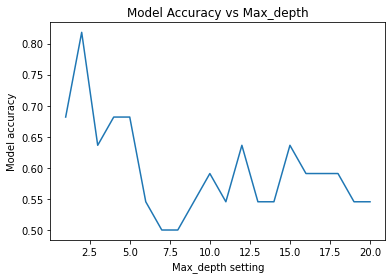

In [50]:
#dict to df
accuracy_depth = pd.DataFrame.from_dict(acc_depth, orient="index")

#plot accuracy vs max_depth
plt.plot(accuracy_depth)
plt.title("Model Accuracy vs Max_depth")
plt.xlabel("Max_depth setting")
plt.ylabel("Model accuracy")
plt.show()

In [66]:
#find highest accuracy

print(max(acc_depth, key=acc_depth.get))
print(max(acc_depth.values()))

2
0.8181818181818182


## Fit and Plot Decision Tree Using Best Depth

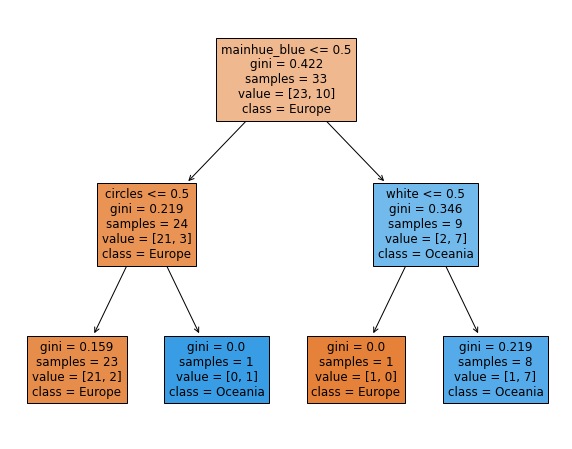

In [72]:
#fit model
dtree = DecisionTreeClassifier(max_depth=2)
dtree.fit(X_train, y_train)

#plot tree
fig = plt.figure(figsize=(10, 8))
tree.plot_tree(dtree, 
               feature_names = X_train.columns,
               class_names = ['Europe', 'Oceania'],
               filled=True)
plt.show()

In [ ]:
## Prune Tree Using CCP Alpha

In [73]:
#get ccp_alphas
path = dtree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

ccp_alphas

array([0.        , 0.04124579, 0.04841897, 0.16903887])

In [74]:
#loop through and find the best value for ccp_alpha
acc_alphas = {}

for i in ccp_alphas:
    dtree = DecisionTreeClassifier(max_depth=2, ccp_alpha=i)
    dtree.fit(X_train, y_train)
    acc_alphas[i] = dtree.score(X_test, y_test)
    
acc_alphas

{0.0: 0.6818181818181818,
 0.04124579124579123: 0.8181818181818182,
 0.04841897233201582: 0.6818181818181818,
 0.16903887358432812: 0.5454545454545454}

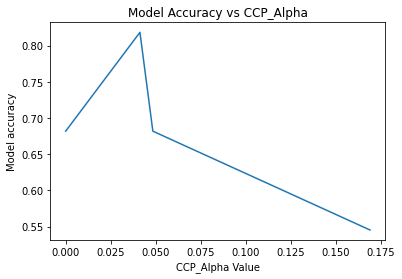

In [78]:
#plot accuracy vs ccp_alpha

#dict to df
accuracy_ccp = pd.DataFrame.from_dict(acc_alphas, orient="index")

#plot accuracy vs max_depth
plt.plot(accuracy_ccp)
plt.title("Model Accuracy vs CCP_Alpha")
plt.xlabel("CCP_Alpha Value")
plt.ylabel("Model accuracy")
plt.show()

In [79]:
#highlight bbest ccp_alpha
print(max(acc_alphas, key=acc_alphas.get))
print(max(acc_alphas.values()))

0.04124579124579123
0.8181818181818182


## Fit and Plot Final Tree

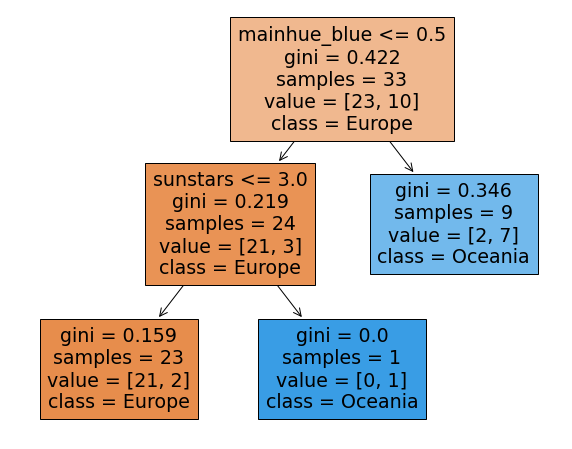

In [80]:
#fit model
dtree = DecisionTreeClassifier(max_depth=2, ccp_alpha=0.04124579124579123)
dtree.fit(X_train, y_train)

#plot tree
fig = plt.figure(figsize=(10, 8))
tree.plot_tree(dtree, 
               feature_names = X_train.columns,
               class_names = ['Europe', 'Oceania'],
               filled=True)
plt.show()

Pruning the tree reduced the tree size by one-two branches.